<a href="https://colab.research.google.com/github/drfperez/DeepPurpose/blob/main/ModelsDescriptors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Importa les llibreries necessàries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Crea un DataFrame amb les dades
data = {
    'LogP': [2.5, 3.0, 2.8, 2.6],
    'Pes Molecular': [300, 350, 320, 310],
    'Activitat': [60, 70, 65, 62]
}

df = pd.DataFrame(data)

# Defineix les variables independents (X) i la variable dependent (y)
X = df[['LogP', 'Pes Molecular']]
y = df['Activitat']

# Crea un objecte de regressió lineal
model = LinearRegression()

# Ajusta el model als teus dades
model.fit(X, y)

# Formula de la regressió múltiple:
# Activitat = β0 + β1 * LogP + β2 * Pes Molecular + ε

# Coeficients de la regressió
print("Coeficients de la regressió:")
print("β0 (Intercepte):", model.intercept_)
print("β1 (Pendent de LogP):", model.coef_[0])
print("β2 (Pendent de Pes Molecular):", model.coef_[1])

# Predicció d'activitat biològica per a una nova molècula amb valors de LogP i Pes Molecular coneguts
new_data = np.array([[2.7, 330]])  # Valors de LogP i Pes Molecular per a la nova molècula
prediction = model.predict(new_data)
print("\nPredicció d'activitat biològica per a la nova molècula:")
print("Activitat predita:", prediction[0])

Coeficients de la regressió:
β0 (Intercepte): 4.999999999999986
β1 (Pendent de LogP): 10.000000000000021
β2 (Pendent de Pes Molecular): 0.09999999999999985

Predicció d'activitat biològica per a la nova molècula:
Activitat predita: 65.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:

# Importa les llibreries necessàries
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Genera dades de regressió aleatòries amb 10 descriptors
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Divideix les dades en conjunts d'entrenament i de prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un objecte de selecció de característiques
selector = SelectKBest(score_func=f_regression, k=5)  # Seleccionem les 5 millors característiques

# Ajusta el selector als teus dades d'entrenament
selector.fit(X_train, y_train)

# Obté els índexs de les característiques seleccionades
selected_indices = selector.get_support(indices=True)

# Filtra les dades d'entrenament i de prova per incloure només les característiques seleccionades
X_train_selected = X_train[:, selected_indices]
X_test_selected = X_test[:, selected_indices]

# Crea un objecte de regressió lineal
model = LinearRegression()

# Ajusta el model als teus dades d'entrenament amb les característiques seleccionades
model.fit(X_train_selected, y_train)

# Predicció amb les dades de prova
y_pred = model.predict(X_test_selected)

# Avalua el rendiment del model
mse = mean_squared_error(y_test, y_pred)
print("Error quadràtic mitjà del model amb les característiques seleccionades:", mse)

Error quadràtic mitjà del model amb les característiques seleccionades: 4197.058387549049


In [ ]:

# Importa les llibreries necessàries
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dades concretes
data = {
    'Descriptor_1': [1.2, 2.5, 3.1, 4.2, 5.0],
    'Descriptor_2': [3.5, 4.2, 2.8, 5.1, 6.0],
    'Descriptor_3': [2.1, 3.2, 1.8, 4.5, 3.9],
    'Descriptor_4': [4.5, 3.8, 5.2, 2.9, 1.5],
    'Descriptor_5': [2.8, 1.5, 3.9, 1.2, 4.1],
    'Activitat': [50, 60, 55, 65, 70]
}

df = pd.DataFrame(data)

# Defineix les variables independents (X) i la variable dependent (y)
X = df.drop('Activitat', axis=1)
y = df['Activitat']

# Crea un objecte de selecció de característiques
selector = SelectKBest(score_func=f_regression, k=3)  # Seleccionem les 3 millors característiques

# Ajusta el selector als teus dades
selector.fit(X, y)

# Obté els índexs de les característiques seleccionades
selected_indices = selector.get_support(indices=True)

# Filtra les dades per incloure només les característiques seleccionades
X_selected = X.iloc[:, selected_indices]

# Divideix les dades en conjunts d'entrenament i de prova
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Crea un objecte de regressió lineal
model = LinearRegression()

# Ajusta el model als teus dades d'entrenament amb les característiques seleccionades
model.fit(X_train, y_train)

# Predicció amb les dades de prova
y_pred = model.predict(X_test)

# Avalua el rendiment del model
mse = mean_squared_error(y_test, y_pred)
print("Error quadràtic mitjà del model amb les característiques seleccionades:", mse)

Error quadràtic mitjà del model amb les característiques seleccionades: 12.127738497176328


Error quadràtic mitjà del model amb les característiques seleccionades: 12.127738497176328
Fórmula matemàtica del model: Activitat = 3.60 * Descriptor_1 + 3.11 * Descriptor_2 + 0.49 * Descriptor_4 + 32.60


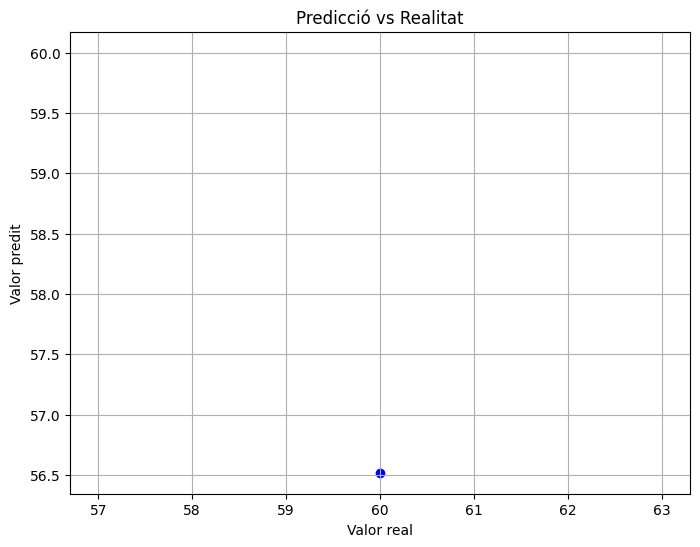

Predicció d'activitat per al nou producte: 54.09533073929961


In [ ]:

# Importa les llibreries necessàries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dades concretes
data = {
    'Descriptor_1': [1.2, 2.5, 3.1, 4.2, 5.0],
    'Descriptor_2': [3.5, 4.2, 2.8, 5.1, 6.0],
    'Descriptor_3': [2.1, 3.2, 1.8, 4.5, 3.9],
    'Descriptor_4': [4.5, 3.8, 5.2, 2.9, 1.5],
    'Descriptor_5': [2.8, 1.5, 3.9, 1.2, 4.1],
    'Activitat': [50, 60, 55, 65, 70]
}

df = pd.DataFrame(data)

# Defineix les variables independents (X) i la variable dependent (y)
X = df.drop('Activitat', axis=1)
y = df['Activitat']

# Crea un objecte de selecció de característiques
selector = SelectKBest(score_func=f_regression, k=3)  # Seleccionem les 3 millors característiques

# Ajusta el selector als teus dades
selector.fit(X, y)

# Obté els índexs de les característiques seleccionades
selected_indices = selector.get_support(indices=True)

# Filtra les dades per incloure només les característiques seleccionades
X_selected = X.iloc[:, selected_indices]

# Divideix les dades en conjunts d'entrenament i de prova
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Crea un objecte de regressió lineal
model = LinearRegression()

# Ajusta el model als teus dades d'entrenament amb les característiques seleccionades
model.fit(X_train, y_train)

# Predicció amb les dades de prova
y_pred = model.predict(X_test)

# Avalua el rendiment del model
mse = mean_squared_error(y_test, y_pred)
print("Error quadràtic mitjà del model amb les característiques seleccionades:", mse)

# Fórmula matemàtica del model
formula = "Activitat = "
for i in range(len(selected_indices)):
    coef = model.coef_[i]
    descriptor = X_selected.columns[i]
    if i == 0:
        formula += f"{coef:.2f} * {descriptor}"
    else:
        formula += f" + {coef:.2f} * {descriptor}"
formula += f" + {model.intercept_:.2f}"

print("Fórmula matemàtica del model:", formula)

# Gràfic de les prediccions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Valor real')
plt.ylabel('Valor predit')
plt.title('Predicció vs Realitat')
plt.grid(True)
plt.show()

# Interpolació d'un nou producte amb descriptors coneguts
nou_producte = {
    'Descriptor_1': [2.0],
    'Descriptor_2': [4.0],
    'Descriptor_3': [2.5],
    'Descriptor_4': [3.8],
    'Descriptor_5': [2.0],
}

df_nou_producte = pd.DataFrame(nou_producte)

# Filtra les dades del nou producte per incloure només les característiques seleccionades
X_nou_producte = df_nou_producte.iloc[:, selected_indices]

# Predicció per al nou producte
activitat_predita = model.predict(X_nou_producte)
print("Predicció d'activitat per al nou producte:", activitat_predita[0])

Error quadràtic mitjà del model amb les característiques seleccionades: 12.127738497176328
Fórmula matemàtica del model: Activitat = 3.60 * Descriptor_1 + 3.11 * Descriptor_2 + 0.49 * Descriptor_4 + 32.60


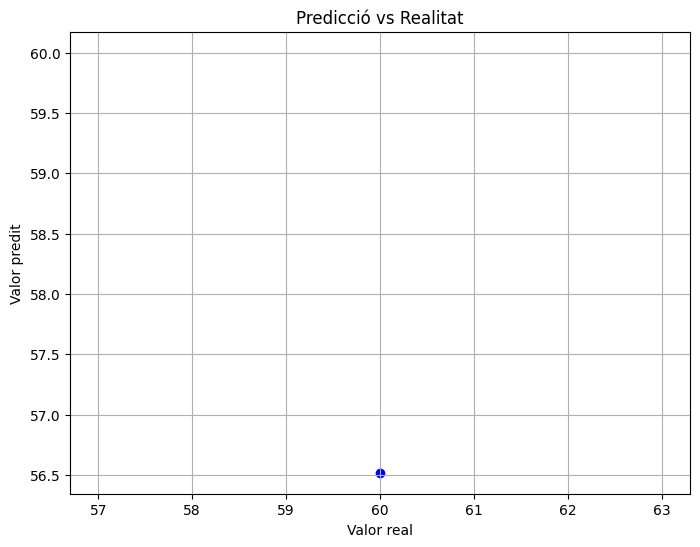

Predicció d'activitat per al nou producte: 54.09533073929961


In [ ]:

# Importa les llibreries necessàries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dades concretes
data = {
    'Descriptor_1': [1.2, 2.5, 3.1, 4.2, 5.0],
    'Descriptor_2': [3.5, 4.2, 2.8, 5.1, 6.0],
    'Descriptor_3': [2.1, 3.2, 1.8, 4.5, 3.9],
    'Descriptor_4': [4.5, 3.8, 5.2, 2.9, 1.5],
    'Descriptor_5': [2.8, 1.5, 3.9, 1.2, 4.1],
    'Activitat': [50, 60, 55, 65, 70]
}

df = pd.DataFrame(data)

# Defineix les variables independents (X) i la variable dependent (y)
X = df.drop('Activitat', axis=1)
y = df['Activitat']

# Crea un objecte de selecció de característiques
selector = SelectKBest(score_func=f_regression, k=3)  # Seleccionem les 3 millors característiques

# Ajusta el selector als teus dades
selector.fit(X, y)

# Obté els índexs de les característiques seleccionades
selected_indices = selector.get_support(indices=True)

# Filtra les dades per incloure només les característiques seleccionades
X_selected = X.iloc[:, selected_indices]

# Divideix les dades en conjunts d'entrenament i de prova
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Crea un objecte de regressió lineal
model = LinearRegression()

# Ajusta el model als teus dades d'entrenament amb les característiques seleccionades
model.fit(X_train, y_train)

# Predicció amb les dades de prova
y_pred = model.predict(X_test)

# Avalua el rendiment del model
mse = mean_squared_error(y_test, y_pred)
print("Error quadràtic mitjà del model amb les característiques seleccionades:", mse)

# Fórmula matemàtica del model
formula = "Activitat = "
for i in range(len(selected_indices)):
    coef = model.coef_[i]
    descriptor = X_selected.columns[i]
    if i == 0:
        formula += f"{coef:.2f} * {descriptor}"
    else:
        formula += f" + {coef:.2f} * {descriptor}"
formula += f" + {model.intercept_:.2f}"

print("Fórmula matemàtica del model:", formula)

# Gràfic de les prediccions utilitzant només els 3 millors descriptors seleccionats
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Valor real')
plt.ylabel('Valor predit')
plt.title('Predicció vs Realitat')
plt.grid(True)
plt.show()

# Interpolació d'un nou producte amb descriptors coneguts
nou_producte = {
    'Descriptor_1': [2.0],
    'Descriptor_2': [4.0],
    'Descriptor_3': [2.5],
    'Descriptor_4': [3.8],
    'Descriptor_5': [2.0],
}

df_nou_producte = pd.DataFrame(nou_producte)

# Filtra les dades del nou producte per incloure només les característiques seleccionades
X_nou_producte = df_nou_producte.iloc[:, selected_indices]

# Predicció per al nou producte
activitat_predita = model.predict(X_nou_producte)
print("Predicció d'activitat per al nou producte:", activitat_predita[0])

Error quadràtic mitjà amb LinearRegression: 22865.689900156845
Error quadràtic mitjà amb Ridge: 24958.565266237812
Error quadràtic mitjà amb Lasso: 40635.166324766775
Error quadràtic mitjà amb ElasticNet: 29168.990902402595

Millor model trobat: LinearRegression

Fórmula matemàtica del model: Activitat = 4.32 + 95.17 * Descriptor_1 + 9.48 * Descriptor_2 + 53.26 * Descriptor_3 + 66.22 * Descriptor_4 + 89.55 * Descriptor_5 + 32.23 * Descriptor_6 + 8.08 * Descriptor_7 + 26.57 * Descriptor_8 + 48.62 * Descriptor_9 + 48.52 * Descriptor_10


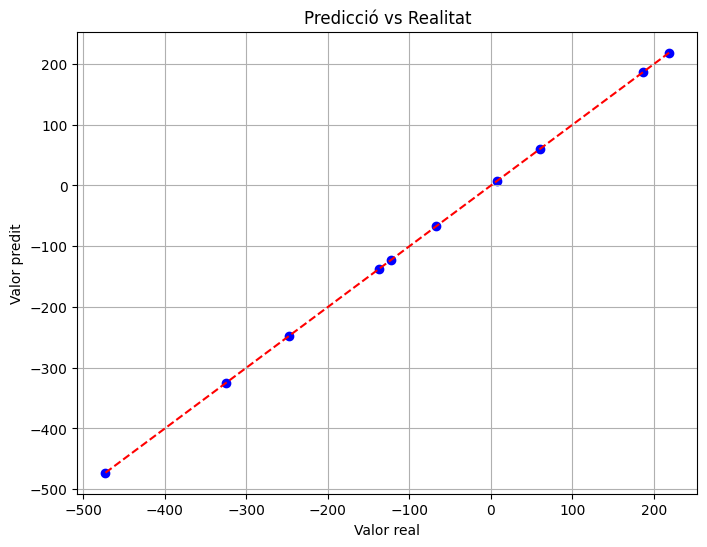

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Descriptor_1
- Descriptor_2
- Descriptor_3
- Descriptor_4
- Descriptor_5
- ...


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

# Generem dades aleatòries amb 10 descriptors per a 10 compostos
X, y = make_regression(n_samples=10, n_features=10, noise=0.1, random_state=42)

# Convertim les dades a un DataFrame de pandas per a millor manipulació
df = pd.DataFrame(X, columns=[f'Descriptor_{i+1}' for i in range(10)])
df['Activitat'] = y

# Separem les dades en variables independents (X) i dependents (y)
X = df.drop('Activitat', axis=1)
y = df['Activitat']

# Dividim les dades en conjunts d'entrenament i de prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creem una llista amb els diferents models a provar
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet()
]

# Creem una llista per emmagatzemar els resultats de la validació creuada per cada model
mse_scores = []

# Iterem sobre els models i els ajustem amb validació creuada
for model in models:
    # Ajustem el model amb validació creuada de 5-folds
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    # Convertim l'error quadràtic mitjà negatiu en positiu i emmagatzemem
    mse_scores.append((-scores.mean(), model))

# Seleccionem el millor model basat en l'error quadràtic mitjà
best_model = min(mse_scores, key=lambda x: x[0])[1]

# Ajustem el millor model amb les dades senceres
best_model.fit(X, y)

# Mostrem l'error quadràtic mitjà de cada model
for mse, model in mse_scores:
    print(f"Error quadràtic mitjà amb {model.__class__.__name__}: {mse}")

# Mostrem el millor model trobat
print(f"\nMillor model trobat: {best_model.__class__.__name__}")

# Fórmula matemàtica del model
formula = f"Activitat = {best_model.intercept_:.2f}"
for i, coef in enumerate(best_model.coef_):
    formula += f" + {coef:.2f} * {X.columns[i]}"
print("\nFórmula matemàtica del model:", formula)

# Gràfic de les prediccions utilitzant el millor model
y_pred = best_model.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('Valor real')
plt.ylabel('Valor predit')
plt.title('Predicció vs Realitat')
plt.grid(True)
plt.show()

# Interpolació d'un nou compost amb descriptors coneguts
nou_compost = {
    f'Descriptor_{i+1}': [np.random.uniform(-1, 1) for i in range(10)]
}

df_nou_compost = pd.DataFrame(nou_compost)

# Predicció per al nou compost amb el millor model
activitat_predita = best_model.predict(df_nou_compost)
print("\nPredicció d'activitat per al nou compost:", activitat_predita[0])

Error quadràtic mitjà amb LinearRegression: 22865.689900156845
Error quadràtic mitjà amb Ridge: 24958.565266237812
Error quadràtic mitjà amb Lasso: 40635.166324766775
Error quadràtic mitjà amb ElasticNet: 29168.990902402595

Millor model trobat: LinearRegression

Fórmula matemàtica del model: Activitat = 4.32 + 95.17 * Descriptor_1 + 9.48 * Descriptor_2 + 53.26 * Descriptor_3 + 66.22 * Descriptor_4 + 89.55 * Descriptor_5 + 32.23 * Descriptor_6 + 8.08 * Descriptor_7 + 26.57 * Descriptor_8 + 48.62 * Descriptor_9 + 48.52 * Descriptor_10


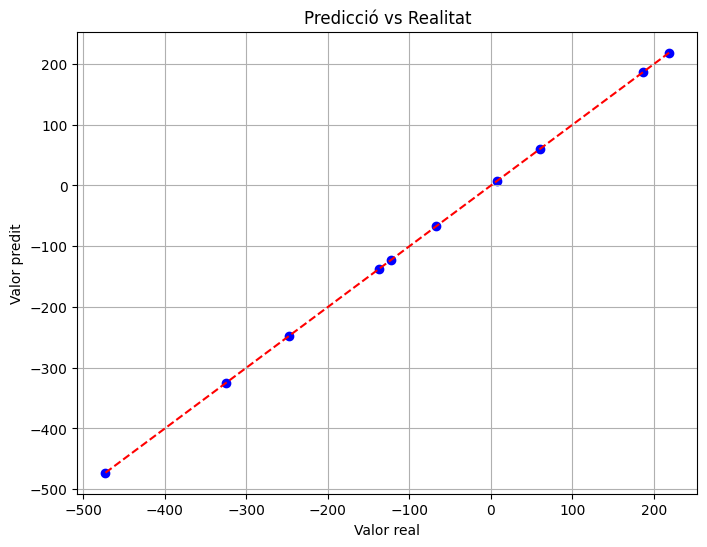

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Descriptor_1
- Descriptor_2
- Descriptor_3
- Descriptor_4
- Descriptor_5
- ...


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

# Generem dades aleatòries amb 10 descriptors per a 10 compostos
X, y = make_regression(n_samples=10, n_features=10, noise=0.1, random_state=42)

# Convertim les dades a un DataFrame de pandas per a millor manipulació
df = pd.DataFrame(X, columns=[f'Descriptor_{i+1}' for i in range(10)])
df['Activitat'] = y

# Separem les dades en variables independents (X) i dependents (y)
X = df.drop('Activitat', axis=1)
y = df['Activitat']

# Dividim les dades en conjunts d'entrenament i de prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creem una llista amb els diferents models a provar
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet()
]

# Creem una llista per emmagatzemar els resultats de la validació creuada per cada model
mse_scores = []

# Iterem sobre els models i els ajustem amb validació creuada
for model in models:
    # Ajustem el model amb validació creuada de 5-folds
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    # Convertim l'error quadràtic mitjà negatiu en positiu i emmagatzemem
    mse_scores.append((-scores.mean(), model))

# Seleccionem el millor model basat en l'error quadràtic mitjà
best_model = min(mse_scores, key=lambda x: x[0])[1]

# Ajustem el millor model amb les dades senceres
best_model.fit(X, y)

# Mostrem l'error quadràtic mitjà de cada model
for mse, model in mse_scores:
    print(f"Error quadràtic mitjà amb {model.__class__.__name__}: {mse}")

# Mostrem el millor model trobat
print(f"\nMillor model trobat: {best_model.__class__.__name__}")

# Fórmula matemàtica del model
formula = f"Activitat = {best_model.intercept_:.2f}"
for i, coef in enumerate(best_model.coef_):
    formula += f" + {coef:.2f} * {X.columns[i]}"
print("\nFórmula matemàtica del model:", formula)

# Gràfic de les prediccions utilitzant el millor model
y_pred = best_model.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('Valor real')
plt.ylabel('Valor predit')
plt.title('Predicció vs Realitat')
plt.grid(True)
plt.show()

# Interpolació d'un nou compost amb descriptors coneguts
nou_compost = {
    f'Descriptor_{i+1}': [np.random.uniform(-1, 1) for i in range(10)]
}

# Creem un DataFrame per al nou compost amb els noms de les columnes corresponents
df_nou_compost = pd.DataFrame(nou_compost)

# Predicció per al nou compost amb el millor model
activitat_predita = best_model.predict(df_nou_compost)
print("\nPredicció d'activitat per al nou compost:", activitat_predita[0])

Error quadràtic mitjà amb LinearRegression: 22865.689900156845
Error quadràtic mitjà amb Ridge: 24958.565266237812
Error quadràtic mitjà amb Lasso: 40635.166324766775
Error quadràtic mitjà amb ElasticNet: 29168.990902402595
Error quadràtic mitjà amb RandomForestRegressor: 38562.93149225102
Error quadràtic mitjà amb XGBRegressor: 41228.46407966444

Millor model trobat: LinearRegression

Fórmula matemàtica del model: Activitat = 4.32 + 95.17 * Descriptor_1 + 9.48 * Descriptor_2 + 53.26 * Descriptor_3 + 66.22 * Descriptor_4 + 89.55 * Descriptor_5 + 32.23 * Descriptor_6 + 8.08 * Descriptor_7 + 26.57 * Descriptor_8 + 48.62 * Descriptor_9 + 48.52 * Descriptor_10


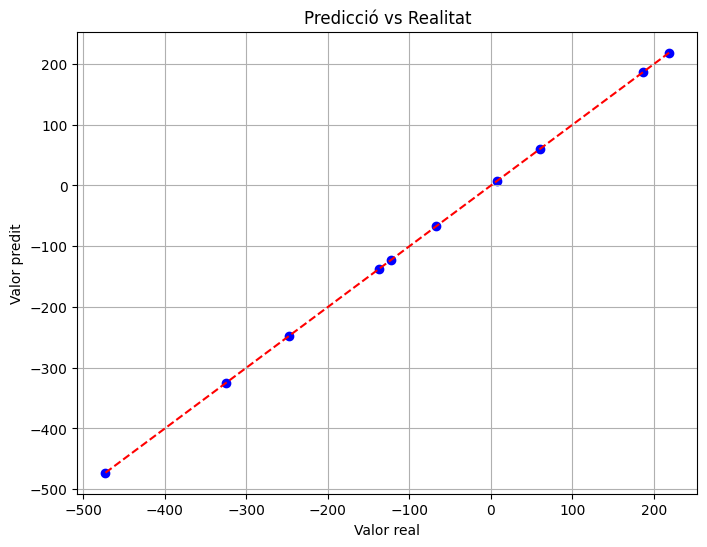

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Descriptor_1
- Descriptor_2
- Descriptor_3
- Descriptor_4
- Descriptor_5
- ...


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Generem dades aleatòries amb 10 descriptors per a 10 compostos
X, y = make_regression(n_samples=10, n_features=10, noise=0.1, random_state=42)

# Convertim les dades a un DataFrame de pandas per a millor manipulació
df = pd.DataFrame(X, columns=[f'Descriptor_{i+1}' for i in range(10)])
df['Activitat'] = y

# Separem les dades en variables independents (X) i dependents (y)
X = df.drop('Activitat', axis=1)
y = df['Activitat']

# Dividim les dades en conjunts d'entrenament i de prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creem una llista amb els diferents models a provar
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    RandomForestRegressor(),
    XGBRegressor()
]

# Creem una llista per emmagatzemar els resultats de la validació creuada per cada model
mse_scores = []

# Iterem sobre els models i els ajustem amb validació creuada
for model in models:
    # Ajustem el model amb validació creuada de 5-folds
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    # Convertim l'error quadràtic mitjà negatiu en positiu i emmagatzemem
    mse_scores.append((-scores.mean(), model))

# Seleccionem el millor model basat en l'error quadràtic mitjà
best_model = min(mse_scores, key=lambda x: x[0])[1]

# Ajustem el millor model amb les dades senceres
best_model.fit(X, y)

# Mostrem l'error quadràtic mitjà de cada model
for mse, model in mse_scores:
    print(f"Error quadràtic mitjà amb {model.__class__.__name__}: {mse}")

# Mostrem el millor model trobat
print(f"\nMillor model trobat: {best_model.__class__.__name__}")

# Fórmula matemàtica del model
formula = f"Activitat = {best_model.intercept_:.2f}"
for i, coef in enumerate(best_model.coef_):
    formula += f" + {coef:.2f} * {X.columns[i]}"
print("\nFórmula matemàtica del model:", formula)

# Gràfic de les prediccions utilitzant el millor model
y_pred = best_model.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('Valor real')
plt.ylabel('Valor predit')
plt.title('Predicció vs Realitat')
plt.grid(True)
plt.show()

# Interpolació d'un nou compost amb descriptors coneguts
nou_compost = {
    f'Descriptor_{i+1}': [np.random.uniform(-1, 1) for i in range(10)]
}

# Creem un DataFrame per al nou compost amb els noms de les columnes corresponents
df_nou_compost = pd.DataFrame(nou_compost)

# Predicció per al nou compost amb el millor model
activitat_predita = best_model.predict(df_nou_compost)
print("\nPredicció d'activitat per al nou compost:", activitat_predita[0])

1/1 [==============================] - 0s 67ms/step
Error quadràtic mitjà amb LinearRegression: 22865.689900156845
Error quadràtic mitjà amb Ridge: 24958.565266237812
Error quadràtic mitjà amb Lasso: 40635.166324766775
Error quadràtic mitjà amb ElasticNet: 29168.990902402595
Error quadràtic mitjà amb RandomForestRegressor: 34298.09890830859
Error quadràtic mitjà amb XGBRegressor: 41228.46407966444
Error quadràtic mitjà amb Sequential: 18865.761752635168
Error quadràtic mitjà amb Sequential: 19026.438960177868

Millor model trobat: Sequential
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 

ValueError: x and y must be the same size

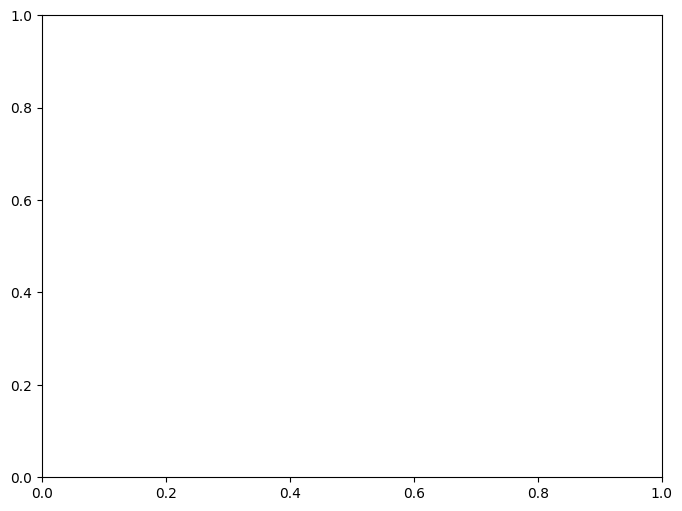

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generem dades aleatòries amb 10 descriptors per a 10 compostos
X, y = make_regression(n_samples=10, n_features=10, noise=0.1, random_state=42)

# Convertim les dades a un DataFrame de pandas per a millor manipulació
df = pd.DataFrame(X, columns=[f'Descriptor_{i+1}' for i in range(10)])
df['Activitat'] = y

# Separem les dades en variables independents (X) i dependents (y)
X = df.drop('Activitat', axis=1)
y = df['Activitat']

# Dividim les dades en conjunts d'entrenament i de prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creem una llista amb els diferents models a provar
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    RandomForestRegressor(),
    XGBRegressor(),
    Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ]),
    Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
]

# Creem una llista per emmagatzemar els resultats de la validació creuada per cada model
mse_scores = []

# Iterem sobre els models i els ajustem amb validació creuada
for model in models:
    if isinstance(model, Sequential):
        # Entrenem models de xarxes neuronals
        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(X_train, y_train, epochs=100, verbose=0)
        y_pred = model.predict(X_test).flatten()
        mse = mean_squared_error(y_test, y_pred)
    else:
        # Ajustem el model amb validació creuada de 5-folds
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        mse = -scores.mean()

    mse_scores.append((mse, model))

# Seleccionem el millor model basat en l'error quadràtic mitjà
best_model = min(mse_scores, key=lambda x: x[0])[1]

# Mostrem l'error quadràtic mitjà de cada model
for mse, model in mse_scores:
    print(f"Error quadràtic mitjà amb {model.__class__.__name__}: {mse}")

# Mostrem el millor model trobat
print(f"\nMillor model trobat: {best_model.__class__.__name__}")

# Si el millor model és una xarxa neuronal, mostrem l'arquitectura del model
if isinstance(best_model, Sequential):
    best_model.summary()

# Gràfic de les prediccions utilitzant el millor model
if not isinstance(best_model, Sequential):
    best_model.fit(X, y)
    y_pred = best_model.predict(X)
else:
    y_pred = best_model.predict(X_test).flatten()

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('Valor real')
plt.ylabel('Valor predit')
plt.title('Predicció vs Realitat')
plt.grid(True)
plt.show()

# Interpolació d'un nou compost amb descriptors coneguts
nou_compost = {
    f'Descriptor_{i+1}': [np.random.uniform(-1, 1) for i in range(10)]
}

# Creem un DataFrame per al nou compost amb els noms de les columnes corresponents
df_nou_compost = pd.DataFrame(nou_compost)

# Predicció per al nou compost amb el millor model
if not isinstance(best_model, Sequential):
    activitat_predita = best_model.predict(df_nou_compost)
else:
    activitat_predita = best_model.predict(df_nou_compost.values.reshape(1, -1))
print("\nPredicció d'activitat per al nou compost:", activitat_predita[0])

Error quadràtic mitjà del model amb les característiques seleccionades: 12.127738497176328
Fórmula matemàtica del model: Activitat = 3.60 * Descriptor_1 + 3.11 * Descriptor_2 + 0.49 * Descriptor_4 + 32.60


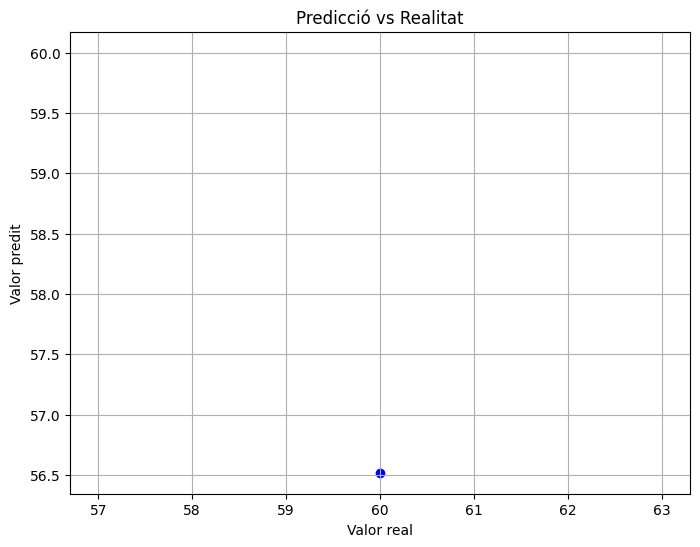

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Descriptor_3
- Descriptor_5


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dades proporcionades
data = {
    'Descriptor_1': [1.2, 2.5, 3.1, 4.2, 5.0],
    'Descriptor_2': [3.5, 4.2, 2.8, 5.1, 6.0],
    'Descriptor_3': [2.1, 3.2, 1.8, 4.5, 3.9],
    'Descriptor_4': [4.5, 3.8, 5.2, 2.9, 1.5],
    'Descriptor_5': [2.8, 1.5, 3.9, 1.2, 4.1],
    'Activitat': [50, 60, 55, 65, 70]
}

# Creem un DataFrame amb les dades
df = pd.DataFrame(data)

# Defineix les variables independents (X) i la variable dependent (y)
X = df.drop('Activitat', axis=1)
y = df['Activitat']

# Crea un objecte de selecció de característiques per seleccionar les 3 millors característiques
selector = SelectKBest(score_func=f_regression, k=3)

# Ajusta el selector als teus dades
selector.fit(X, y)

# Obté els índexs de les característiques seleccionades
selected_indices = selector.get_support(indices=True)

# Filtra les dades per incloure només les característiques seleccionades
X_selected = X.iloc[:, selected_indices]

# Divideix les dades en conjunts d'entrenament i de prova
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Crea un objecte de regressió lineal
model = LinearRegression()

# Ajusta el model als teus dades d'entrenament amb les característiques seleccionades
model.fit(X_train, y_train)

# Predicció amb les dades de prova
y_pred = model.predict(X_test)

# Avalua el rendiment del model
mse = mean_squared_error(y_test, y_pred)
print("Error quadràtic mitjà del model amb les característiques seleccionades:", mse)

# Fórmula matemàtica del model
formula = "Activitat = "
for i in range(len(selected_indices)):
    coef = model.coef_[i]
    descriptor = X_selected.columns[i]
    if i == 0:
        formula += f"{coef:.2f} * {descriptor}"
    else:
        formula += f" + {coef:.2f} * {descriptor}"
formula += f" + {model.intercept_:.2f}"

print("Fórmula matemàtica del model:", formula)

# Gràfic de les prediccions utilitzant només els 3 millors descriptors seleccionats
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Valor real')
plt.ylabel('Valor predit')
plt.title('Predicció vs Realitat')
plt.grid(True)
plt.show()

# Interpolació d'un nou producte amb descriptors coneguts
nou_producte = {
    'Descriptor_1': [2.0],
    'Descriptor_2': [4.0],
    'Descriptor_3': [2.5],
    'Descriptor_4': [3.8],
    'Descriptor_5': [2.0],
}

# Convertim les dades del nou producte en un DataFrame
df_nou_producte = pd.DataFrame(nou_producte)

# Predicció per al nou producte amb el model seleccionat
activitat_predita_nou_producte = model.predict(df_nou_producte)

print("\nPredicció d'activitat per al nou producte:", activitat_predita_nou_producte[0])